Content and Use of Files
========================

Formatting and Encoding
-----------------------

The dataset files are written as [comma-separated values](http://en.wikipedia.org/wiki/Comma-separated_values) files with a single header row. Columns that contain commas (`,`) are escaped using double-quotes (`"`). These files are encoded as UTF-8. If accented characters in movie titles or tag values (e.g. Misérables, Les (1995)) display incorrectly, make sure that any program reading the data, such as a text editor, terminal, or script, is configured for UTF-8.




Ratings Data File Structure (ratings.csv)
-----------------------------------------

All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

    userId,movieId,rating,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


Tags Data File Structure (tags.csv)
-----------------------------------

All tags are contained in the file `tags.csv`. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

    userId,movieId,tag,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


Movies Data File Structure (movies.csv)
---------------------------------------

Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie, and has the following format:

    movieId,title,genres

Movie titles are entered manually or imported from <https://www.themoviedb.org/>, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)


Links Data File Structure (links.csv)
---------------------------------------

Identifiers that can be used to link to other sources of movie data are contained in the file `links.csv`. Each line of this file after the header row represents one movie, and has the following format:

    movieId,imdbId,tmdbId

movieId is an identifier for movies used by <https://movielens.org>. E.g., the movie Toy Story has the link <https://movielens.org/movies/1>.

imdbId is an identifier for movies used by <http://www.imdb.com>. E.g., the movie Toy Story has the link <http://www.imdb.com/title/tt0114709/>.

tmdbId is an identifier for movies used by <https://www.themoviedb.org>. E.g., the movie Toy Story has the link <https://www.themoviedb.org/movie/862>.

Use of the resources listed above is subject to the terms of each provider.


# importing files

In [1]:
import pandas as pd
from plotnine import *
import numpy as np

In [2]:
#importing movie ratings:
# userId,movieId,rating,timestamp

ratings = pd.read_csv("ml-latest-small/ratings.csv")


#importing movies 
# movieId,title,genres

movie = pd.read_csv("ml-latest-small/movies.csv")



#importing tags 
# userId,movieId,tag,timestamp

tags = pd.read_csv("ml-latest-small/tags.csv")


In [3]:
print(ratings.shape)
print(movie.shape)
print(tags.shape)

(100836, 4)
(9742, 3)
(3683, 4)


In [4]:
moviesAndratings = movie.merge(ratings, how='inner', left_on = 'movieId',right_on='movieId')

moviesAndratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


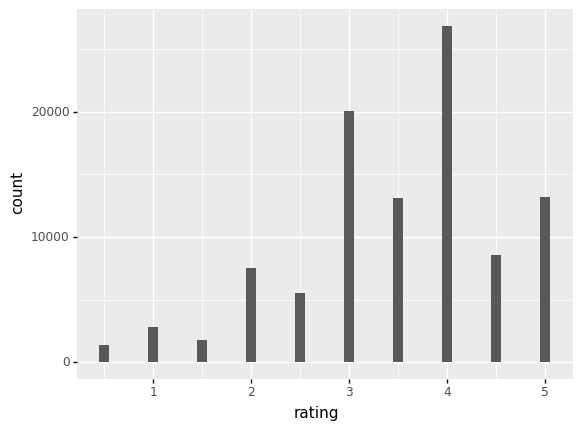

<ggplot: (128063325880)>

In [5]:
#visualizing the distribution of the ratings

(
    ggplot(moviesAndratings, aes(x='rating'))
    + geom_histogram( bins= 20, binwidth=0.1)
)

In [6]:
#creating the matrix of ratings

ratings_matrix  = moviesAndratings.pivot_table(index = 'userId',columns ='title',values='rating').fillna(0)

ratings_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#the bro's idea
#ratings_matrix = ratings_matrix.loc[ratings_matrix['Unforgiven (1992)'] > 0]
#ratings_matrix.head(70)

## 1- Recommending similar movies
#### this recommender works by finding the correlation between a movie of our choice and the other movies in the list. the recommender uses the list of  ratings received by a movie and the number of ratings received by a movie to calculate the correlation.

In [8]:
ratings_grouped = pd.DataFrame(moviesAndratings.groupby('title')['rating'].mean())
ratings_grouped.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [9]:
ratings_grouped['number of ratings'] = pd.DataFrame(moviesAndratings.groupby('title')['rating'].count())

ratings_grouped.head()

,rating,number of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [10]:
ratings_grouped.sort_values('number of ratings',ascending = False).head()

,rating,number of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [11]:
#finding similar movies to pulp fiction 

#we need to get all the ratings of the pulp fiction movie

pulpfiction_ratings = ratings_matrix["Unforgiven (1992)"]

pulpfiction_ratings

userId
1      0.0
2      0.0
3      0.0
4      4.0
5      0.0
      ... 
606    0.0
607    0.0
608    0.0
609    0.0
610    0.0
Name: Unforgiven (1992), Length: 610, dtype: float64

In [12]:
similrtopulpfiction = ratings_matrix.corrwith(pulpfiction_ratings)
similrtopulpfiction.dropna(inplace= True)
similrtopulpfiction = pd.DataFrame(similrtopulpfiction, columns = ['correlations'])
similrtopulpfiction.sort_values('correlations',ascending=False).head()


,correlations
title,
Unforgiven (1992),1.000000
"Outlaw Josey Wales, The (1976)",0.460411
"Fistful of Dollars, A (Per un pugno di dollari) (1964)",0.458369
Platoon (1986),0.456386
Apocalypse Now (1979),0.410585


In [13]:
similrtopulpfiction = similrtopulpfiction.join(ratings_grouped['number of ratings'])
similrtopulpfiction.head()

,correlations,number of ratings
title,,
'71 (2014),-0.011254,1
'Hellboy': The Seeds of Creation (2004),-0.011254,1
'Round Midnight (1986),-0.015929,2
'Salem's Lot (2004),-0.011254,1
'Til There Was You (1997),-0.015452,2


In [14]:
similrtopulpfiction[similrtopulpfiction['number of ratings']<= 45  ].sort_values("correlations",ascending=False).head(10)



,correlations,number of ratings
title,,
Unforgiven (1992),1.000000,45
"Outlaw Josey Wales, The (1976)",0.460411,18
"Fistful of Dollars, A (Per un pugno di dollari) (1964)",0.458369,39
High Plains Drifter (1973),0.398285,11
Deliverance (1972),0.384276,30
For a Few Dollars More (Per qualche dollaro in più) (1965),0.377927,33
"Karate Kid, The (1984)",0.365783,38
Cold Mountain (2003),0.362785,12
First Blood (Rambo: First Blood) (1982),0.360991,30


# -------------------------------------------------------------------------------

## 2- recommending similar movies(cosine similarity)
#### this recommender uses cosine similarity to find similar movies to the one we're interested in. it does that by computing the similarity between the ratings given to the movies.

In [15]:
#creating the matrix of ratings

ratings_matrix_2  = moviesAndratings.pivot_table(index = 'title',columns ='userId',values='rating').fillna(0)

ratings_matrix_2.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#creating array matrix from the matrix/table of ratings

from scipy.sparse import csr_matrix

ratings_matrix_2_arraymatrix = csr_matrix(ratings_matrix_2.values)


In [57]:
#checking the sparsity of the matrix
sparsity = ratings_matrix_2_arraymatrix.count_nonzero()/(ratings_matrix_2_arraymatrix.shape[0]*ratings_matrix_2_arraymatrix.shape[1])

print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.7%


#### This approach looks for the $k$ nearest neighbours of a given movie by identifying $k$ points in the dataset that are closest to movie $m$. kNN makes use of distance metrics such as:

#### Cosine similarity
#### Euclidean distance
#### Manhattan distance
#### Pearson correlation

In [17]:
#importing the k-nearest neighbor model and fitting it to the array matrix

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = "cosine",algorithm='brute')
model_knn.fit(ratings_matrix_2_arraymatrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [18]:
movies_frame = pd.DataFrame(ratings_matrix_2.index)
movies_frame
movies_frame.columns.get_loc("xXx (2002)")

KeyError: 'xXx (2002)'

In [ ]:
ratings_matrix_2[ratings_matrix_2['']==’Donna’].index.values

In [ ]:
ratings_matrix_2.columns.get_loc("'Hellboy': The Seeds of Creation (2004)")

In [ ]:
## selecting a random movie to find similar movies to 
movie_index = np.random.choice(ratings_matrix_2.shape[0])
print(movie_index)


## getting distances and indices of the similar movies

distances , indices  = model_knn.kneighbors(ratings_matrix_2.iloc[movie_index,:].values.reshape(1,-1),n_neighbors = 6)


In [ ]:
####

for i in range(0,len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(ratings_matrix_2.index[movie_index]))
    else:
        print('{0}:{1}, with distance of {2}:'.format(i,ratings_matrix_2.index[indices.flatten()[i]],distances.flatten()[i]))

## 3- content based recommender

#### this recommender will work by using the tags given by users for each movie. 

In [46]:
moviesAndtags = movie.merge(tags, how='inner', left_on = 'movieId',right_on='movieId')

moviesAndtags['tags comb'] = moviesAndtags.groupby('title')['tag'].transform(lambda x : ' '.join(x))

moviesAndtagsCleaned = moviesAndtags[['title','tags comb']]
moviesAndtagsCleaned = pd.DataFrame(moviesAndtagsCleaned.drop_duplicates())
moviesAndtagsCleaned.fillna('')
moviesAndtagsCleaned


,title,tags comb
0,Toy Story (1995),pixar pixar fun
3,Jumanji (1995),fantasy magic board game Robin Williams game
7,Grumpier Old Men (1995),moldy old
9,Father of the Bride Part II (1995),pregnancy remake
11,Sabrina (1995),remake
...,...,...
3668,Game Night (2018),Comedy funny Rachel McAdams
3671,Tomb Raider (2018),adventure Alicia Vikander video game adaptation
3674,Deadpool 2 (2018),Josh Brolin Ryan Reynolds sarcasm
3677,Solo: A Star Wars Story (2018),Emilia Clarke star wars


In [49]:
#the following model is gonna help us create vectors from text tags
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3 , max_features=None,strip_accents='unicode',analyzer='word',token_pattern='\w{1,}',
                      ngram_range=(1,3),stop_words='english')

In [50]:
#fitting the model to the tags

tfv_matrix  = tfv.fit_transform(moviesAndtagsCleaned['tags comb'])


In [52]:
from sklearn.metrics.pairwise import sigmoid_kernel
#compute the sigmoid_kernel (this basically makes every number between 0 and 1)
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)

In [53]:
#reverse mapping indices and movies 

indicess = pd.Series(moviesAndtagsCleaned.index, index=moviesAndtagsCleaned['title']).drop_duplicates()
indicess

title
Toy Story (1995)                         0
Jumanji (1995)                           3
Grumpier Old Men (1995)                  7
Father of the Bride Part II (1995)       9
Sabrina (1995)                          11
                                      ... 
Game Night (2018)                     3668
Tomb Raider (2018)                    3671
Deadpool 2 (2018)                     3674
Solo: A Star Wars Story (2018)        3677
Gintama: The Movie (2010)             3679
Length: 1572, dtype: int64

In [54]:
##making the function give_rec

def give_rec(title, sig= sig):
    #get the index corresponding to the title
    idx = indicess[title]
    
    #get the similarity scores 
    sig_scores = list(enumerate(sig[idx]))
    
    #sore the movies
    sig_scores = sorted(sig_scores, key=lambda x:x[1],reverse=True)
    
    #scores of the 10 most similar movies 
    sig_scores = sig_scores[1:11]
    
    #movies indices 
    movie_indices = [i[0] for i in sig_scores]
    
    #top 10 most similar movies 
    return moviesAndtagsCleaned['title'].iloc[movie_indices]

In [56]:
give_rec('Unforgiven (1992)')

2074         My Neighbor Totoro (Tonari no Totoro) (1988)
2180    Laputa: Castle in the Sky (Tenkû no shiro Rapy...
2609    Kiki's Delivery Service (Majo no takkyûbin) (1...
2879             Tekkonkinkreet (Tekkon kinkurîto) (2006)
3679                            Gintama: The Movie (2010)
2616    Neon Genesis Evangelion: The End of Evangelion...
2151    Cowboy Bebop: The Movie (Cowboy Bebop: Tengoku...
2621                                Animatrix, The (2003)
928                                          Akira (1988)
1483             Princess Mononoke (Mononoke-hime) (1997)
Name: title, dtype: object